In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math


from sklearn import preprocessing
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.metrics import davies_bouldin_score


from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from pyGRNN import GRNN
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


In [2]:
df = pd.read_csv ('data.csv')
print (df)

          Depth       DT    RHOB      NPHI     PEF      SGR        RT
0     3721.3032  52.0986  2.7239  0.022300  4.8353  16.9627   82.0975
1     3680.0028  51.4541  2.7049  0.010361  5.1586  14.8379  101.0010
2     3355.8480  58.9997  2.6341  0.069400  3.0677  40.0960   11.7112
3     3607.0032  68.4025  2.4923  0.044807  2.4374  24.8052   89.8962
4     3303.1176  66.0666  2.5236  0.158167  3.9781  45.7906   20.7068
...         ...      ...     ...       ...     ...      ...       ...
7780  3341.3700  58.6565  2.6492  0.032700  2.8434  60.8251   54.3081
7781  3425.1828  60.6100  2.5230  0.199800  3.4360  45.8900   34.4200
7782  3727.8564  52.1424  2.7119  0.013900  5.2959  13.5511  145.1670
7783  3718.2552  50.3287  2.7002  0.013900  4.7705  15.8894  252.8820
7784  3424.2684  65.3800  2.4150  0.238300  3.2170  37.5700   44.9300

[7785 rows x 7 columns]


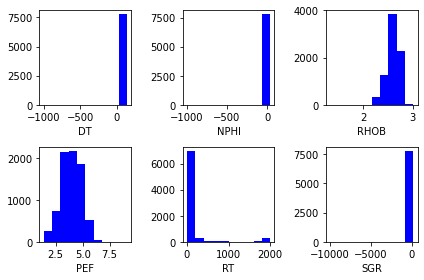

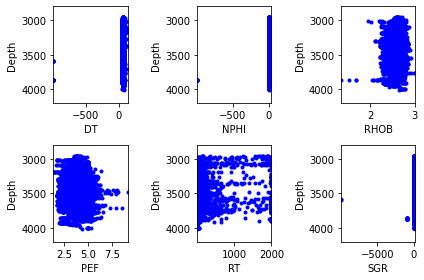

In [3]:
def depth_plot(ax,df,feat,postfix):
    ax.plot(df[feat],df['Depth'],'b.')
    ax.set_xlim(min(df[feat]),max(df[feat]))
    ax.set_ylim(2800,4200)
    ax.invert_yaxis()
    ax.set_xlabel(feat)
    ax.set_ylabel('Depth')
    #ax.figure.set_size_inches(ax.figure.get_size_inches()[1]/2, ax.figure.get_size_inches()[1])
    fig.tight_layout()
    ax.figure.savefig('depth_'+postfix+'.png')
def freq_plot(ax,df,feat,postfix):
    ax.hist(df[feat],color = "blue")
    ax.set_xlabel(feat)
    fig.tight_layout()
    ax.figure.savefig('hist_'+postfix+'.png')
    
    
feats=['DT','NPHI','RHOB','PEF','RT','SGR']

fig, axis = plt.subplots(2,3)
for i,feat in enumerate(feats):  
    ax=axis[math.floor(i/3), math.floor(i%3)]
    freq_plot(ax,df,feat,'before') 
#plt.show()
#plt.cla()


fig, axis = plt.subplots(2,3)
for i,feat in enumerate(feats):  
    ax=axis[math.floor(i/3), math.floor(i%3)]
    depth_plot(ax,df,feat,'before')#,label,xlabel )  
#plt.show()
#plt.cla()   


In [4]:
#Remove outliers
'''
instruction to remove the entire rows when they have outlier and/or null values. Note that if any of these conditions are satisfied, the entire row will be deleted.
DT smaller than 0 || DT greater than 100
NPHI smaller than -0.1 || NPHI greater than 0.45
RHOB smaller than 2.0 || RHOB greater than 3.0
PEF smaller than 0.0 || PEF greater than 7.0
RT smaller than 0.0 || RT greater than 2000
GR smaller than 0 || GR greater than150
'''
df = df.dropna(axis=1)
df = df.drop(df[(df['DT'] < 0.0) | (df['DT'] >100.0)].index)
df = df.drop(df[(df['NPHI'] < -0.1) | (df['NPHI'] >0.45)].index)
df = df.drop(df[(df['RHOB'] < 2.0) | (df['RHOB'] >3.0)].index)
df = df.drop(df[(df['PEF'] < 0.0) | (df['PEF'] >7.0)].index)
df = df.drop(df[(df['RT'] < 0.0) | (df['RT'] >2000)].index)
df = df.drop(df[(df['SGR'] < 0.0) | (df['SGR'] >150.0)].index)

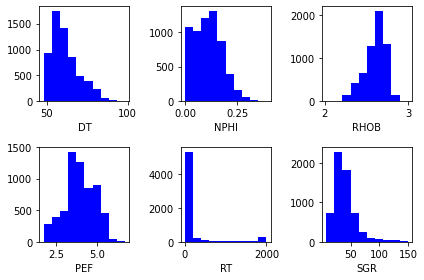

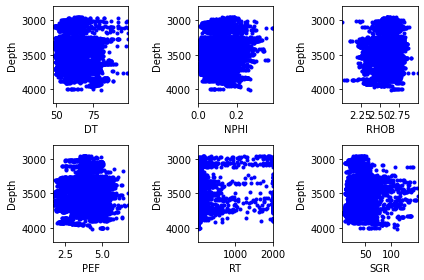

In [5]:

fig, axis = plt.subplots(2,3)
for i,feat in enumerate(feats): 
    ax=axis[math.floor(i/3), math.floor(i%3)]
    freq_plot(ax,df,feat,'after') 
#plt.show()
#plt.cla()


fig, axis = plt.subplots(2,3)
for i,feat in enumerate(feats):  
    ax=axis[math.floor(i/3), math.floor(i%3)]
    depth_plot(ax,df,feat,'after')#,label,xlabel ) 
#plt.show()
#plt.cla()


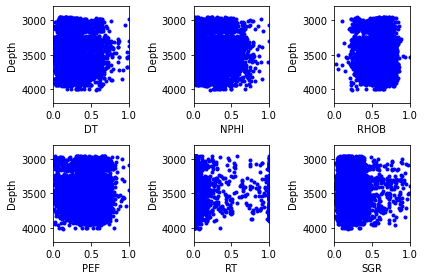

In [7]:

#Scale data between 0-1
new_data = preprocessing.MinMaxScaler().fit_transform(df[feats])
df_new=pd.DataFrame(new_data, columns = feats)
df_new.insert(loc=0, column='Depth', value=df['Depth'])


fig, axis = plt.subplots(2,3)
for i,feat in enumerate(feats):  
    ax=axis[math.floor(i/3), math.floor(i%3)]
    depth_plot(ax,df_new,feat,'_scaled')#,label,xlabel )  
#plt.show()
#plt.cla()


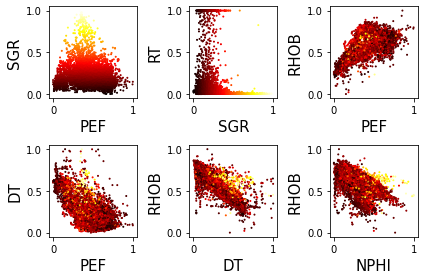

In [8]:
#########scatter plots##############
def scatter_plot(df,feat1,feat2,col,i):
    ax=axis[math.floor(i/3), math.floor(i%3)]
    ax.scatter(df[feat1],df[feat2],s=1,c=df[col],cmap='hot')
    ax.set_xlabel(feat1, fontsize=15)
    ax.set_ylabel(feat2, fontsize=15)
    fig.tight_layout()
    ax.figure.savefig('colored_by_'+col+'.png')

i=0
fig, axis = plt.subplots(2,3)
scatter_plot(df_new,'PEF','SGR',feat,0)  
scatter_plot(df_new,'SGR','RT',feat,1)
scatter_plot(df_new,'PEF','RHOB',feat,2)
scatter_plot(df_new,'PEF','DT',feat,3)
scatter_plot(df_new,'DT','RHOB',feat,4)
scatter_plot(df_new,'NPHI','RHOB',feat,5)

#plt.show()
#plt.cla()

#scatter_plot(df_new,'NPHI','DT',feat,i++)

C:\Users\alshahin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alshahin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alshahin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

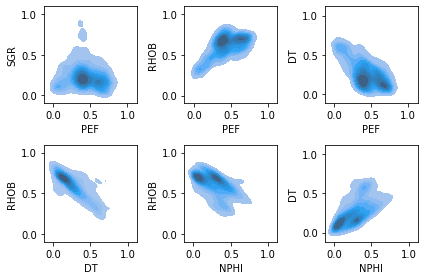

In [10]:
#########Density plots##############

def freq_plot(df,feat1,feat2,i):
    ax=axis[math.floor(i/3), math.floor(i%3)]
    sns.set_palette("Reds")
    res = sns.kdeplot(df_new[feat1],df_new[feat2],shade=True,ax=ax)
    res.set(xlabel=feat1, ylabel=feat2)
    fig.tight_layout()
    ax.figure.savefig('colored_by_freq.png')
    i+=1
    #plt.show()
#plt.cla()
fig, axis = plt.subplots(2,3)
i=0   
freq_plot(df_new,'PEF','SGR',i); i+=1
freq_plot(df_new,'PEF','RHOB',i); i+=1
freq_plot(df_new,'PEF','DT',i); i+=1
freq_plot(df_new,'DT','RHOB',i); i+=1
freq_plot(df_new,'NPHI','RHOB',i); i+=1
freq_plot(df_new,'NPHI','DT',i); i+=1
#plt.cla()

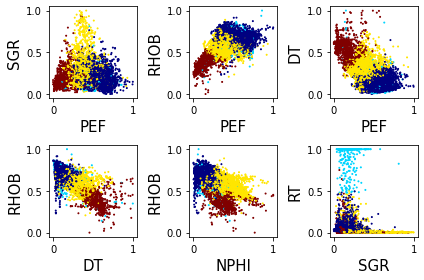

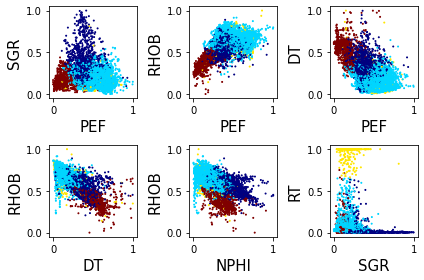

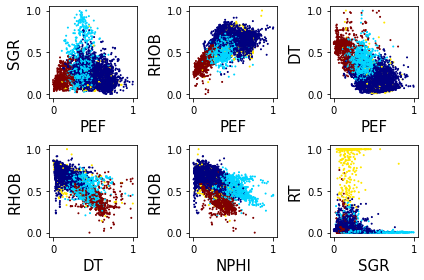

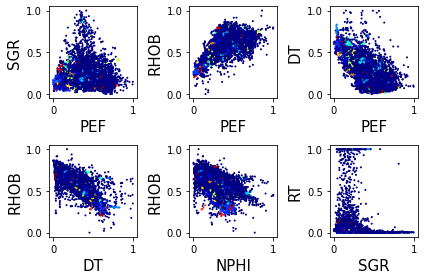

In [11]:

db_score=100
best_algo='None'
db_arr=[]
labels=[]

def scatter_plot_cluster(df,feat1,feat2,col,clus_name,i):
    ax=axis[math.floor(i/3), math.floor(i%3)]
    ax.scatter(df[feat1],df[feat2],s=1,c=col,cmap='jet')
    ax.set_xlabel(feat1, fontsize=15)
    ax.set_ylabel(feat2, fontsize=15)
    fig.tight_layout()
    ax.figure.savefig(clus_name+'.png')

cls_algos = ['KMeans','SpectralClustering','AgglomerativeClustering','DBSCAN']
for algo in cls_algos:
    if algo=='DBSCAN':
        cls=DBSCAN(eps=0.05)
    else:
        cls=globals()[algo](n_clusters=4) 
    col = cls.fit_predict(df_new[feats])
    db_new=davies_bouldin_score(df_new[feats],col)
    db_arr.append(db_new)
    if db_new<db_score:
        best_algo=algo
        db_score=db_new
        labels=col
    cl_name=algo
    fig, axis = plt.subplots(2,3)
    i=0   
    scatter_plot_cluster(df_new,'PEF','SGR',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'PEF','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'PEF','DT',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'DT','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'NPHI','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'SGR','RT',col,cl_name,i); i+=1

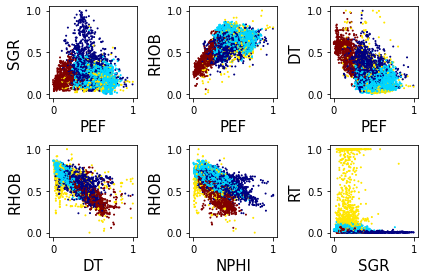

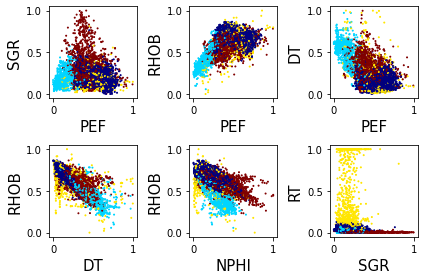

In [11]:
cls_algos = ['GaussianMixture','BayesianGaussianMixture']
for algo in cls_algos:
    cls = GaussianMixture(n_components=4)
    col = cls.fit_predict(df_new[feats])
    cl_name=algo
    db_new=davies_bouldin_score(df_new[feats],col)
    db_arr.append(db_new)
    if db_new<db_score:
        best_algo=algo
        db_score=db_new
        labels=col
    fig, axis = plt.subplots(2,3)
    i=0   
    scatter_plot_cluster(df_new,'PEF','SGR',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'PEF','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'PEF','DT',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'DT','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'NPHI','RHOB',col,cl_name,i); i+=1
    scatter_plot_cluster(df_new,'SGR','RT',col,cl_name,i); i+=1

In [12]:
print(db_arr)
print("best algo is ",best_algo,"with score ",db_score)


[1.0648710903019563, 1.0867145819446349, 1.0943128040317804, 1.3387909276067256]
best algo is  KMeans with score  1.0648710903019563


In [13]:
df_new['label']=labels
print(df_new)

          Depth        DT      NPHI      RHOB       PEF        RT       SGR  \
0     3721.3032  0.081155  0.062488  0.725755  0.619210  0.040949  0.068098   
1     3680.0028  0.068418  0.032000  0.706298  0.683865  0.050402  0.053149   
2     3355.8480  0.217546  0.182764  0.633794  0.265719  0.005752  0.230844   
3     3607.0032  0.403380  0.119963  0.488582  0.139669  0.044849  0.123271   
4     3303.1176  0.357214  0.409444  0.520635  0.447784  0.010251  0.270907   
...         ...       ...       ...       ...       ...       ...       ...   
6114  3358.8888  0.210763  0.089046  0.649258  0.220862  0.027053  0.376677   
6115  3383.4252  0.249372  0.515760  0.520020  0.339373  0.017108  0.271606   
6116  3499.8660  0.082021  0.041037  0.713466  0.711323  0.072487  0.044096   
6117  3477.1512  0.046176  0.041037  0.701485  0.606251  0.126350  0.060547   
6118  3427.3236  0.343644  0.614075  0.409421  0.295576  0.022363  0.213074   

      label  
0         0  
1         0  
2        

In [14]:

def plot_regression(y_test,y_pred,title,cls_id,i):
    ax=axis[i]
    ax.scatter(y_test,y_pred,color="black")
    z = np.polyfit(y_test,y_pred, 1)
    p = np.poly1d(z)

    #add trendline to plot
    ax.plot(y_test, p(y_test),color="blue", linewidth=3)
    #plt.plot(np.array(X)[ind_test,:],y_pred, color="blue", linewidth=3)
    ax.set_title(title,fontsize=10)
    fig.tight_layout()
    ax.figure.savefig('Regression_cluster'+str(cls_id)+'.png')
#select a cluster
cluster=df_new[df_new['label']==1].reset_index()
X=cluster[['DT', 'RHOB', 'SGR', 'NPHI']]
y=cluster['PEF']
mseArr=[]



In [15]:

PF = PolynomialFeatures(degree=3, include_bias=True)
pFeats=PF.fit_transform(X)
pFeats_y=PF.fit_transform(np.array(y).reshape(-1,1))
X_train, X_test, y_train, y_test,ind_train,ind_test = train_test_split(pFeats, pFeats_y,np.array(range(0,len(y))), test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
mseArr.append(MSE(y_test, y_pred))





In [17]:

def apply_regression(reg_mod,X_train, y_train,X_test):
    if reg_mod=='linear':
        reg = LinearRegression()
    elif reg_mod=='lasso':
        reg = Lasso(alpha=0.0005)
    elif reg_mod=='knn':
        reg = KNeighborsRegressor(n_neighbors=3)
    elif reg_mod=='DT':
        reg = regressor = DecisionTreeRegressor(random_state=42)
    elif reg_mod=='GB':
        reg = GradientBoostingRegressor(random_state=42)
    elif reg_mod=='RF':
        reg = RandomForestRegressor(random_state=42)
    elif reg_mod=='ADR':
        reg = AdaBoostRegressor(random_state=42)
    elif reg_mod=='ET':
        reg = ExtraTreesRegressor(random_state=42)
    elif reg_mod=='GRNN':    
        reg = GRNN(calibration = 'gradient_search')
    elif reg_mod=='ANN':    
        reg = MLPRegressor(random_state=42)
    print(reg)
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test) 
    return y_pred
regressions=['poly','linear','lasso','knn','DT','GB','RF','ADR','ET','GRNN','ANN']
X_train, X_test, y_train, y_test,ind_train,ind_test = train_test_split(X, y,np.array(range(0,len(y))), test_size=0.33, random_state=42)
reg=None
for reg_mod in regressions:
    reg=None
    if reg_mod=='poly':
        continue
    else:
        print(reg_mod)
        y_pred=apply_regression(reg_mod,X_train, y_train,X_test)
        mseArr.append(MSE(y_test, y_pred))
       

linear
LinearRegression()
lasso
Lasso(alpha=0.0005)
knn
KNeighborsRegressor(n_neighbors=3)
DT
DecisionTreeRegressor(random_state=42)
GB
GradientBoostingRegressor(random_state=42)
RF
RandomForestRegressor(random_state=42)
ADR
AdaBoostRegressor(random_state=42)
ET
ExtraTreesRegressor(random_state=42)
GRNN
GRNN(calibration='gradient_search')
ANN
MLPRegressor(random_state=42)


In [20]:
mseArr=np.array(mseArr)
best_ind=mseArr.argsort()[:4]
print(mseArr)
print(best_ind)
best_algos=[regressions[i] for i in best_ind if i>0 ]
print(best_algos)



[0.00811982 0.01137654 0.011405   0.00770568 0.00738701 0.00519069
 0.00493754 0.00814878 0.00456347 0.00514263 0.0179662 ]
[8 6 9 5]
['ET', 'RF', 'GRNN', 'GB']


ET
ExtraTreesRegressor(random_state=42)
RF
RandomForestRegressor(random_state=42)
GRNN
GRNN(calibration='gradient_search')
GB
GradientBoostingRegressor(random_state=42)
ET
ExtraTreesRegressor(random_state=42)
RF
RandomForestRegressor(random_state=42)
GRNN
GRNN(calibration='gradient_search')
GB
GradientBoostingRegressor(random_state=42)
ET
ExtraTreesRegressor(random_state=42)
RF
RandomForestRegressor(random_state=42)
GRNN
GRNN(calibration='gradient_search')
GB
GradientBoostingRegressor(random_state=42)
ET
ExtraTreesRegressor(random_state=42)
RF
RandomForestRegressor(random_state=42)
GRNN
GRNN(calibration='gradient_search')
GB
GradientBoostingRegressor(random_state=42)


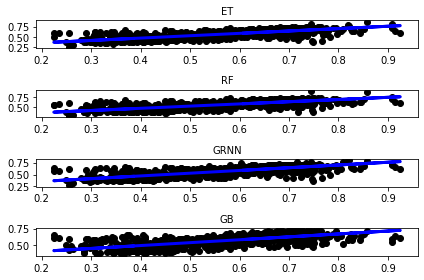

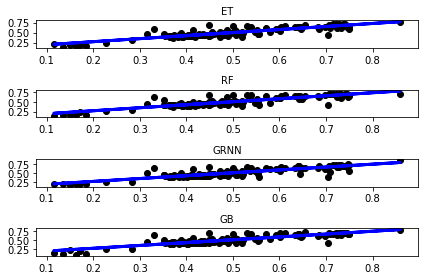

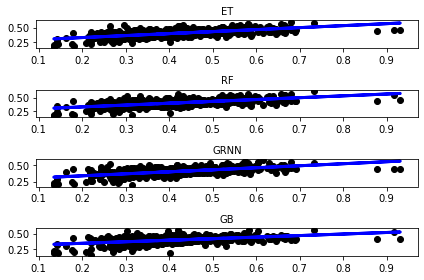

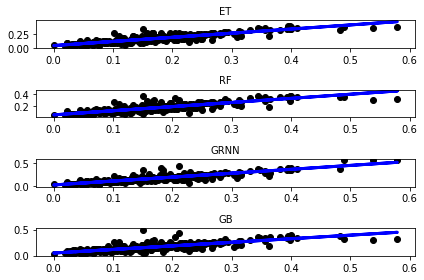

In [21]:
for c in range(0,4):
    fig, axis = plt.subplots(len(best_algos))
    ii=0
    cluster=df_new[df_new['label']==c].reset_index()
    X=cluster[['DT', 'RHOB', 'SGR', 'NPHI']]
    y=cluster['PEF']
    X_train, X_test, y_train, y_test,ind_train,ind_test = train_test_split(X, y,np.array(range(0,len(y))), test_size=0.33, random_state=42)
    for reg_mod in best_algos:
        print(reg_mod)
        y_pred=apply_regression(reg_mod,X_train, y_train,X_test)
        #mseArr.append(MSE(y_test, y_pred))
        plot_regression(y_test,y_pred,reg_mod,c,ii);ii+=1